In [7]:
import pandas as pd
import numpy as np

import xgboost as xgb

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.grid_search import GridSearchCV

import matplotlib
import matplotlib.pyplot as plt

In [8]:
from sklearn.metrics import r2_score

In [9]:
import sys
sys.path.append('../lib')

import XgbAdjustmentHelper as xgbhelper
import SklearnModelCurve as curve_helper

In [10]:
munged_train_df = pd.read_csv('../data/offline/train.csv', index_col=0)
munged_test_df = pd.read_csv('../data/offline/test.csv', index_col=0)
y_train_df = pd.read_csv('../data/offline/y_train.csv', index_col=0)

X_train, X_test, y_train, y_test = train_test_split(munged_train_df.values, y_train_df.values, test_size=0.5, random_state=1729)
X_all_train = munged_train_df.values
y_all_train = y_train_df['y'].values

In [11]:
feature_names = munged_train_df.columns

In [6]:
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.1, n_estimators=5000,
                             silent=False, objective='reg:linear', subsample=0.8,
                             colsample_bytree=0.8, gamma=0, min_child_weight = 1,
                             scale_pos_weight=1, seed=27)

feat_data = xgbhelper.ModelFit(xgb_model, feature_names, X_train, y_train, X_test, y_test, 13)
plt.show()


 cv_result
    test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0         3.701948       0.012292         3.701967        0.002786
1         3.332486       0.012594         3.332507        0.002496
2         2.999909       0.012777         2.999932        0.002319
3         2.700550       0.013075         2.700575        0.002027
4         2.431111       0.012918         2.431144        0.001830
5         2.188815       0.012786         2.188851        0.001611
6         1.970660       0.012656         1.970700        0.001466
7         1.774442       0.012597         1.774487        0.001265
8         1.597698       0.012375         1.597815        0.001119
9         1.438687       0.012132         1.438811        0.001011
10        1.295555       0.012035         1.295680        0.000954
11        1.166780       0.011799         1.166897        0.000913
12        1.050879       0.011575         1.050931        0.000837
13        0.946615       0.011303         0.946666

TypeError: 'str' object is not callable

In [37]:
#粗调
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=0.75,\
                             colsample_bytree=1, gamma=0, min_child_weight = 7,\
                             scale_pos_weight=1, seed=27)

params1 = {
 'learning_rate':[0.07, 0.15, 0.1],
 'n_estimators':[70, 100, 130]
}
search = xgbhelper.ModelParamSearch(xgb_model, params1, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.55244, std: 0.07553, params: {'n_estimators': 70, 'learning_rate': 0.07}
mean: 0.54879, std: 0.06850, params: {'n_estimators': 100, 'learning_rate': 0.07}
mean: 0.54460, std: 0.06816, params: {'n_estimators': 130, 'learning_rate': 0.07}
mean: 0.53835, std: 0.06577, params: {'n_estimators': 70, 'learning_rate': 0.15}
mean: 0.52923, std: 0.06404, params: {'n_estimators': 100, 'learning_rate': 0.15}
mean: 0.52361, std: 0.06515, params: {'n_estimators': 130, 'learning_rate': 0.15}
mean: 0.54611, std: 0.06570, params: {'n_estimators': 70, 'learning_rate': 0.1}
mean: 0.54018, std: 0.06449, params: {'n_estimators': 100, 'learning_rate': 0.1}
mean: 0.53371, std: 0.06471, params: {'n_estimators': 130, 'learning_rate': 0.1}

best_params
{'n_estimators': 70, 'learning_rate': 0.07}

best_score
0.5524367275981976


In [ ]:
# grid_scores
# mean: 0.58419, std: 0.04146, params: {'n_estimators': 300, 'learning_rate': 0.1}
# mean: 0.56780, std: 0.03931, params: {'n_estimators': 500, 'learning_rate': 0.1}
# mean: 0.55673, std: 0.03853, params: {'learning_rate': 0.1, 'n_estimators': 700}
# mean: 0.59762, std: 0.04345, params: {'learning_rate': 0.05, 'n_estimators': 300}
# mean: 0.58820, std: 0.04370, params: {'n_estimators': 500, 'learning_rate': 0.05}
# mean: 0.58058, std: 0.04150, params: {'n_estimators': 700, 'learning_rate': 0.05}
# mean: -2.23612, std: 0.20937, params: {'n_estimators': 300, 'learning_rate': 0.01}
# mean: 0.56070, std: 0.07694, params: {'learning_rate': 0.01, 'n_estimators': 500}
# mean: 0.60553, std: 0.04735, params: {'n_estimators': 700, 'learning_rate': 0.01}

# best_params
# {'n_estimators': 700, 'learning_rate': 0.01}

# best_score
# 0.6055259557874768
# grid_scores
# mean: 0.59959, std: 0.04273, params: {'n_estimators': 100, 'learning_rate': 0.1}
# mean: 0.56780, std: 0.03931, params: {'n_estimators': 500, 'learning_rate': 0.1}
# mean: 0.54487, std: 0.03614, params: {'n_estimators': 1000, 'learning_rate': 0.1}
# mean: 0.50337, std: 0.02948, params: {'n_estimators': 5000, 'learning_rate': 0.1}
# mean: -157.68663, std: 10.21243, params: {'n_estimators': 100, 'learning_rate': 0.01}
# mean: 0.56070, std: 0.07694, params: {'n_estimators': 500, 'learning_rate': 0.01}
# mean: 0.60253, std: 0.04289, params: {'n_estimators': 1000, 'learning_rate': 0.01}
# mean: 0.57324, std: 0.03981, params: {'n_estimators': 5000, 'learning_rate': 0.01}
# mean: -432.48545, std: 29.95086, params: {'n_estimators': 100, 'learning_rate': 0.005}
# mean: -7.27195, std: 0.34109, params: {'n_estimators': 500, 'learning_rate': 0.005}
# mean: 0.56017, std: 0.07727, params: {'n_estimators': 1000, 'learning_rate': 0.005}
# mean: 0.59060, std: 0.04177, params: {'n_estimators': 5000, 'learning_rate': 0.005}

# best_params
# {'n_estimators': 1000, 'learning_rate': 0.01}

# best_score
# 0.6025250124501833

In [19]:
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=0.8,\
                             colsample_bytree=0.8, gamma=0, min_child_weight = 5,\
                             scale_pos_weight=1, seed=27)

params2 = {
 'max_depth':[3, 4],
 'min_child_weight':[6, 7, 8]
}
search = xgbhelper.ModelParamSearch(xgb_model, params2, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.60576, std: 0.04754, params: {'max_depth': 3, 'min_child_weight': 6}
mean: 0.60603, std: 0.04764, params: {'max_depth': 3, 'min_child_weight': 7}
mean: 0.60594, std: 0.04792, params: {'max_depth': 3, 'min_child_weight': 8}
mean: 0.60507, std: 0.04768, params: {'max_depth': 4, 'min_child_weight': 6}
mean: 0.60558, std: 0.04784, params: {'max_depth': 4, 'min_child_weight': 7}
mean: 0.60496, std: 0.04802, params: {'max_depth': 4, 'min_child_weight': 8}

best_params
{'max_depth': 3, 'min_child_weight': 7}

best_score
0.6060283413417352


In [8]:
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=0.8,\
                             colsample_bytree=0.75, gamma=0, min_child_weight = 7,\
                             scale_pos_weight=1, seed=27)

params3 = {
 'subsample':[i/100.0 for i in range(60, 80, 5)],
 'colsample_bytree':[i/100.0 for i in range(85, 105, 5)]
}
search = xgbhelper.ModelParamSearch(xgb_model, params3, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.60438, std: 0.04767, params: {'subsample': 0.6, 'colsample_bytree': 0.85}
mean: 0.60476, std: 0.04732, params: {'subsample': 0.65, 'colsample_bytree': 0.85}
mean: 0.60484, std: 0.04748, params: {'subsample': 0.7, 'colsample_bytree': 0.85}
mean: 0.60521, std: 0.04762, params: {'subsample': 0.75, 'colsample_bytree': 0.85}
mean: 0.60419, std: 0.04827, params: {'subsample': 0.6, 'colsample_bytree': 0.9}
mean: 0.60452, std: 0.04789, params: {'subsample': 0.65, 'colsample_bytree': 0.9}
mean: 0.60464, std: 0.04761, params: {'subsample': 0.7, 'colsample_bytree': 0.9}
mean: 0.60517, std: 0.04780, params: {'subsample': 0.75, 'colsample_bytree': 0.9}
mean: 0.60373, std: 0.04817, params: {'subsample': 0.6, 'colsample_bytree': 0.95}
mean: 0.60453, std: 0.04813, params: {'subsample': 0.65, 'colsample_bytree': 0.95}
mean: 0.60488, std: 0.04795, params: {'subsample': 0.7, 'colsample_bytree': 0.95}
mean: 0.60542, std: 0.04812, params: {'subsample': 0.75, 'colsample_bytree': 0.95}
m

In [14]:
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=0.75,\
                             colsample_bytree=1, gamma=0, min_child_weight = 7,\
                             scale_pos_weight=1, seed=27)

params4 = {
 'reg_alpha':[0.01, 0.1, 1, 10],
}
search = xgbhelper.ModelParamSearch(xgb_model, params4, X_all_train, y_all_train, 'r2')


grid_scores
mean: 0.60589, std: 0.04800, params: {'reg_alpha': 0.01}
mean: 0.60585, std: 0.04867, params: {'reg_alpha': 0.1}
mean: 0.60178, std: 0.04944, params: {'reg_alpha': 1}
mean: 0.58620, std: 0.05555, params: {'reg_alpha': 10}

best_params
{'reg_alpha': 0.01}

best_score
0.6058871005998877


In [18]:
avg_score = 0
y_mean = np.mean(y_train_df['y'])
xgb_model = xgb.XGBRegressor(max_depth=3, learning_rate=0.01, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=0.75,\
                             colsample_bytree=1, gamma=0, base_score=y_mean,\
                             scale_pos_weight=1, seed=27)

for i in range(10,20):
    X_train, X_test, y_train, y_test = train_test_split(munged_train_df.values, y_train_df.values, test_size=0.5, random_state=i)
    xgb_model.fit(X_train, y_train)
    y_pred_xgb = xgb_model.predict(X_test)
    
    score = r2_score(y_test, y_pred_xgb)
    avg_score += score
    print(score)
    
print(avg_score / 10)

0.526722006259
0.566279727215
0.516854705086
0.497058232998
0.508101571196
0.573735689037
0.556740960231
0.504733411688
0.564482722578
0.527834927496
0.534254395378


In [ ]:
0.565268592999
0.569993076681
0.466781693386
0.563923226094
0.440493545425
0.610018672501
0.541920037679
0.588080948083
0.57489070066
0.572391670021
0.549376216353

In [ ]:
0.557212286089
0.557178876366
0.555581057331
0.558875570645

In [14]:
xgb_model = xgb.XGBRegressor(max_depth=4, learning_rate=0.005, n_estimators=700,\
                             silent=False, objective='reg:linear', subsample=0.95,\
                             colsample_bytree=1, gamma=0, base_score=y_mean,\
                             scale_pos_weight=1, seed=27)

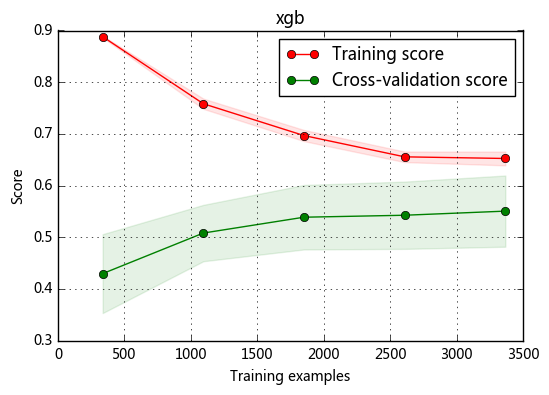

In [15]:
curve_helper.plot_learning_curve(xgb_model, 'xgb', X_all_train, y_all_train, cv=5)

In [16]:
xgb_model.fit(X_all_train, y_all_train)
y_pred = xgb_model.predict(munged_test_df.values)
output = pd.DataFrame({'id': munged_test_df.index, 'y': y_pred})
output.to_csv('../data/online/xgboost-pca-ica-6-7-1.csv', index=False)

In [22]:
y_pred

array([ 69.72631073,  83.14871979,  70.18686676, ...,  82.90158844,
        98.74907684,  83.40969849], dtype=float32)